<a href="https://colab.research.google.com/github/alouwyck/maxsypy/blob/main/seminaries/UM6P_jan_2025/Seminary_UM6P_Jan_2025_Part_6_Axisymmetric_flow_in_multilayer_aquifer_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

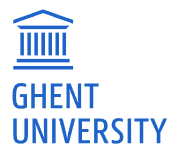<br>


**Axisymmetric Flow in Multilayer Aquifer Systems**<br>
Seminary on Groundwater Modeling<br>
University Mohammed VI Polytechnic<br>
January 6, 2025<br>
Dr. Andy Louwyck

---



---

# **Part 6 - Axisymmetric Flow in Multilayer Aquifer Systems**

This notebook contains some code examples to illustrate the use of axisymmetric multilayer well-flow solutions discussed in the sixth part of the presentation. The explanation provided with each example is relatively concise. To gain a good understanding of what's going on, I recommend reading the notebook side by side with the slides. For a full comprehension of the discussed models, I refer to [my PhD thesis](https://github.com/alouwyck/PhD) (Louwyck, 2023).

## 0. Import statements

We need the following libraries:
- [NumPy](https://numpy.org/)
- [Matplotlib](https://matplotlib.org/)

Importing module `inspect` will allow us to print the source code of the functions implemented in the `maxsypy` package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import inspect

We also clone the MAxSyPy package from GitHub for simulating axisymmetric groundwater flow:

In [2]:
import os, shutil

# remove directory 'maxsypy' first if it already exists
path = "maxsypy"
if os.path.exists(path):
    shutil.rmtree(path)

# clone maxsypy repository from Github
!git clone https://github.com/alouwyck/maxsypy


# put maxsypy package directory in the current working directory
os.rename(path, 'temp')
shutil.copytree(os.path.join('temp', path), path);
shutil.rmtree('temp')

Cloning into 'maxsypy'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 157 (delta 41), reused 0 (delta 0), pack-reused 60 (from 1)
Receiving objects: 100% (157/157), 6.54 MiB | 12.92 MiB/s, done.
Resolving deltas: 100% (75/75), done.


The [MAxSyPy](https://github.com/alouwyck/maxsypy) package implements several analytical and semi-analytical solutions discussed in my PhD thesis (Louwyck, 2023).

We will also use the [TimML](https://timml.readthedocs.io/en/latest) and [TTim](https://ttim.readthedocs.io/en/latest) packages:

In [3]:
!pip install timml ttim -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.0 MB/s eta 0:00:00


In [4]:
import timml, ttim

## 1. The Hemker solutions

In previous notebooks, specific axisymmetric models were illustrated. The solutions of these models are available from module `maxsypy.special`.

The generalized multilayer solutions for steady and transient multilayer flow developed by Hemker are implemented respectively in classes `Steady` and `Transient`, and can be imported from module `maxsypy.multilayer`:

In [5]:
from maxsypy.multilayer import Steady, Transient

In [6]:
print(inspect.getdoc(Steady))

Class to simulate steady two-dimensional radial or parallel flow in a multilayer aquifer system.

Parameters
----------
T : array_like
  Layer transmissivities [L²/T]. The length of `T` is equal to the number of layers.
Q : array_like, default: `None`
  Discharges [L³/T] at inner model boundary. The length of `Q` is equal to the number of layers.
h_in : array_like, default: `None`
     Constant heads [L] at inner model boundary. The length of `h_in` is equal to the number of layers.
c : array_like
  Vertical resistances [T] between layers. The length of `c` is the number of layers minus one.
c_top : float, default: `inf`
      Vertical resistance [T] of the upper boundary of the aquifer system.
      By default, the upper boundary is impervious.
h_top : float, default: `0.0`
      Constant head [L] of the upper boundary condition.
c_bot : float, default: `inf`
      Vertical resistance [T] of the lower boundary of the aquifer system.
      By default, the lower boundary is impervious.


In [7]:
print(inspect.getdoc(Transient))

Class to simulate transient two-dimensional radial or parallel flow in a multilayer aquifer system.

Parameters
----------
T : array_like
  Layer transmissivities [L²/T]. The length of `T` is equal to the number of layers.
S : array_like
  Layer storativities [-]. The length of `S` is equal to the number of layers.
Q : array_like, default: `None`
  Discharges [L³/T] at inner model boundary. The length of `Q` is equal to the number of layers.
h_in : array_like, default: `None`
     Constant heads [L] at inner model boundary. The length of `h_in` is equal to the number of layers.
c : array_like
  Vertical resistances [T] between layers. The length of `c` is the number of layers minus one.
c_top : float, default: `inf`
      Vertical resistance [T] of the upper boundary of the aquifer system.
      By default, the upper boundary is impervious.
h_top : float, default: `0.0`
      Constant head [L] of the upper boundary condition.
c_bot : float, default: `inf`
      Vertical resistance [T] 

Let's illustrate the use of these classes by constructing the following three-layer model:

In [8]:
T = [100, 200, 50]            # aquifer transmissivities (m²/d)
S = [0.1, 0.05, 0.01]         # aquifer storativities (-)
c = [100, 500, 1000, np.inf]  # aquitard resistances (d)
Q = [-100, -250, 0]           # pumping rates (m³/d)

The steady-state and transient-state are instantiated as follows:

In [9]:
steady = Steady(T=T, Q=Q, c_top=c[0], c=c[1:-1], c_bot=c[-1])
transient = Transient(T=T, S=S, Q=Q, c_top=c[0], c=c[1:-1], c_bot=c[-1])

Head or drawdown is simulated by invoking method `h` on these model objects. In case of a steady-state model, only distances `r` are passed:

> `s1 = steady.h(r)`

The transient-state model also needs times `t`:

> `s2 = transient.h(r, t)`

Let's illustrate the use of these methods by creating the time-drawdown and the distance-drawdown graphs for this example:

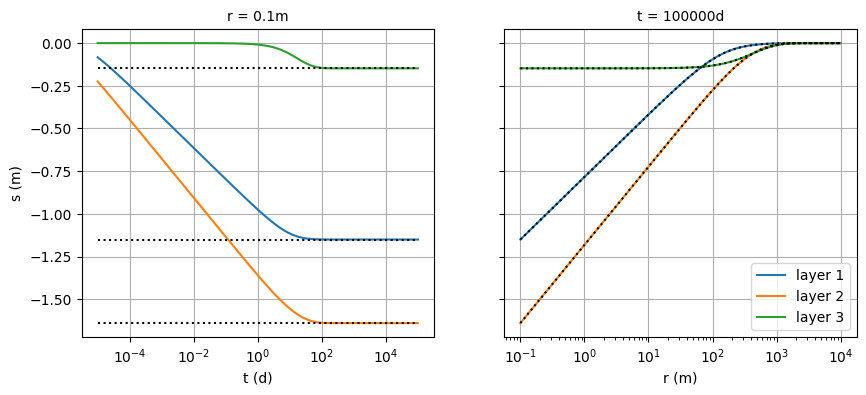

In [10]:
r = np.logspace(-1, 4, 100)  # radial distances (m)
t = np.logspace(-5, 5, 100)  # simulation times (d)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True);

ax1.semilogx(t, transient.h(r[0], t).squeeze().T);  # transient drawdown (m)
ax1.semilogx(t[[0, -1]], steady.h([r[0], r[0]]).T, 'k:');  # steady-state drawdown (m)
ax1.set_ylabel('s (m)');
ax1.set_xlabel('t (d)');
ax1.set_title('r = ' + str(r[0]) + 'm', fontdict=dict(size=10));
ax1.grid();

ax2.semilogx(r, transient.h(r, t[-1]).squeeze().T);  # transient drawdown (m)
ax2.semilogx(r, steady.h(r).T, 'k:');  # steady-state drawdown (m)
ax2.legend([f'layer {i+1}' for i in range(steady.nl)]);
ax2.set_xlabel('r (m)');
ax2.set_title('t = ' + str(int(t[-1])) + 'd', fontdict=dict(size=10));
ax2.grid();

We see that that steady state is reached after approximately 100 days of pumping.

Note that the same classes can be use to simulate **parallel flow** in a multilayer aquifer system. As an example, consider a river with a half-width of 10 m in which the water level is increased by 1 m:

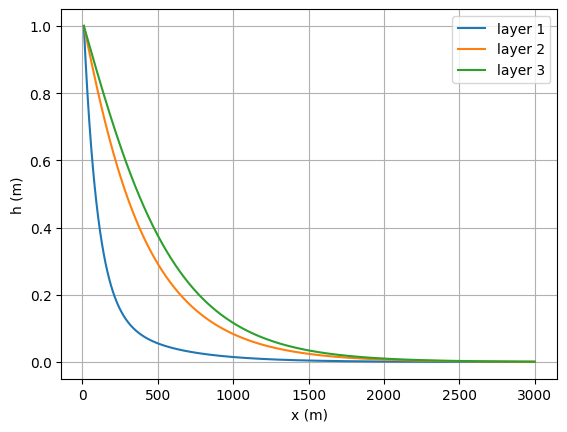

In [11]:
river = Steady(T=T, c_top=c[0], c=c[1:-1], c_bot=c[-1],  # hydraulic parameters
               r_in=10,         # half-width of the river is 10 m
               h_in=[1, 1, 1],  # instead of pumping rate Q, a constant head h_in equal to 1 m is defined
               axi=False)       # by default axi is True, but in case of parallel flow, it is set to False

x = np.linspace(river.r_in, 3000, 1000)  # horizontal distances (m)
h = river.h(x)  # head change (m)

plt.plot(x, h.T);
plt.legend([f'layer {i+1}' for i in range(river.nl)]);
plt.xlabel('x (m)');
plt.ylabel('h (m)');
plt.grid();

## 2. TimML and TTim

The well-flow example can also be simulated using TimML and TTim, with the former used for the steady-state simulation and the latter for the transient-state simulation. Both packages actually apply the Hemker solution method, so we should be able to reproduce the same results!

Let's start with the steady-state solution:

In [12]:
model = timml.ModelMaq(
    z=[6, 5, 4, 3, 2, 1, 0],  # set layer thicknesses to unity, and also include resistance layers
    kaq=T,                    # we use T as the layer thicknesses are set to unity
    c=c[:-1],                 # the lower boundary is always impermeable, i.e. c -> inf
    topboundary='semi',       # the top boundary is leaky or semi-confined
    hstar=0                   # to simulate drawdowns set constant head above semi-confining top to zero
)

upper_well = timml.Well(
    model,     # add the well to the model
    Qw=-Q[0],  # the first pumping rate
    layers=0   # resistance layers are not included in the numbering!
)

lower_well = timml.Well(
    model,     # add the well to the model
    Qw=-Q[1],  # the second pumping rate
    layers=1   # resistance layers are not included in the numbering!
)

model.solve()  # solve the model

s_tim = np.array([model.head(x=0, y=r) for r in r])  # get the drawdowns at distances r

Comparing the TimML result with the solution obtained from the `Steady` model:

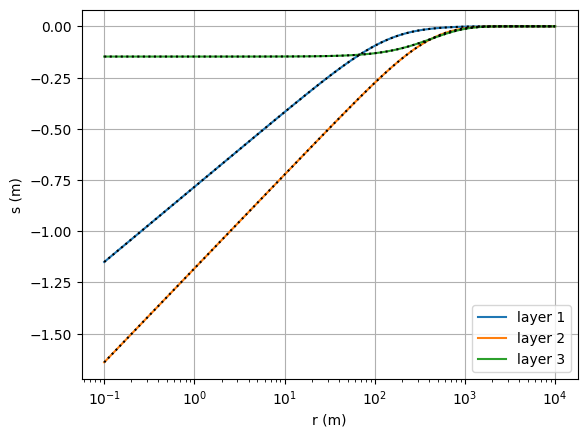

In [13]:
plt.semilogx(r, steady.h(r).T, '-');  # steady-state drawdown (m)
plt.semilogx(r, s_tim, 'k:');         # TimML drawdown (m)

plt.legend([f'layer {i+1}' for i in range(steady.nl)]);
plt.xlabel('r (m)');
plt.ylabel('s (m)');
plt.grid();

The drawdown curves are virtually the same, as they should!

To obtain the transient-state solution, we have to use TTim:

In [14]:
model = ttim.ModelMaq(
    z=[6, 5, 4, 3, 2, 1, 0],  # set layer thicknesses to unity, and also include resistance layers
    kaq=T,                    # we use T as the layer thicknesses are set to unity
    Saq=S,                    # and we use S for the same reason
    c=c[:-1],                 # the lower boundary is always impermeable, i.e. c -> inf
    topboundary='semi',       # the top boundary is leaky or semi-confined
    tmin=t[0],                # the minimum time for which heads can be computed
    tmax=t[-1]                # the maximum time for which heads can be computed
)

upper_well = ttim.Well(
    model,                # add the well to the model
    tsandQ=[(0, -Q[0])],  # the first pumping rate
    layers=0,             # resistance layers are not included in the numbering!
    rw=1e-5               # well radius -> 0
)

upper_well = ttim.Well(
    model,                # add the well to the model
    tsandQ=[(0, -Q[1])],  # the second pumping rate
    layers=1,             # resistance layers are not included in the numbering!
    rw=1e-5               # well radius -> 0
)

model.solve()  # solve the model

s_tim = np.array(model.head(x=0, y=r[0], t=t))  # get the drawdowns at distances r[0]

self.neq  2
solution complete


Comparing the TTim result with the solution obtained from the `Transient` model:

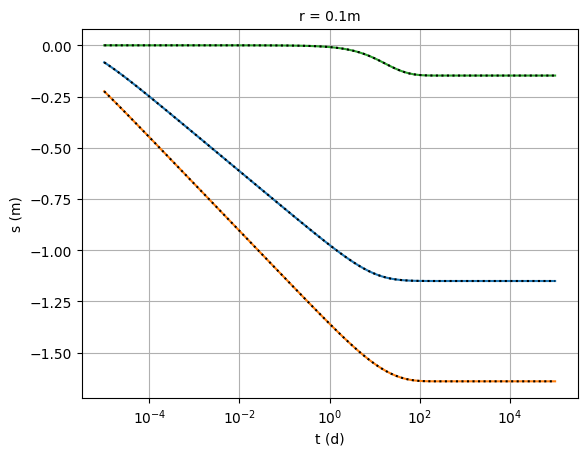

In [15]:
plt.semilogx(t, transient.h(r[0], t).squeeze().T);  # transient drawdown (m)
plt.semilogx(t, s_tim.T, 'k:');                     # TTim drawdown (m)

plt.xlabel('t (d)');
plt.ylabel('s (m)');
plt.title('r = ' + str(r[0]) + 'm', fontdict=dict(size=10));
plt.grid();

Again, the drawdown curves are virtually identical, as expected!

---